# Quantum pendulum

In [1]:
# import sympy as sym
# from sympy import I, exp, pi, mathieus, mathieuc, N, evalf

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.integrate as integrate

from numpy import pi, sqrt, exp
from scipy.special import mathieu_a, mathieu_b, mathieu_cem, mathieu_sem

import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("notebook")

Physical parameters

In [2]:
M = np.float64(1)
g = np.float64(1)
l = np.float64(1)
U0 = np.float64(M * g * l)
h = np.float64(0.06)
q = np.float64((4 * M * l**2 * U0) / h**2)

Characteristic values $a$ & $b$ of even Mathieu functions:

In [3]:
# Even char. value

def a(n, q):
    return mathieu_a(n, q)

# Odd char. value


def b(n, q):
    return mathieu_b(n, q)

Eigenfunctions:

In [4]:
# Both, the mathieu_cem and mathieu_sem unpack two values, the
# result of their respective mathieu function and its derivative
# with respect to x (in degrees).


def ce(n, q, x):
    val, _ = mathieu_cem(n, q, x) / sqrt(pi)

    return val


def se(n, q, x):
    val, _ = mathieu_sem(n, q, x) / sqrt(pi)

    return val


def f(n, q, x):
    if n % 2 == 0:
        return ce(n, q, (x - 180) / 2)
    else:
        return se(n + 1, q, (x - 180) / 2)

In [5]:
def phi(m, x):
    return exp(m * x * 1j) / sqrt(2 * pi)

To fix the problem with the degrees the x argument of the function y just needed to be multiplied by $180 / \pi$.

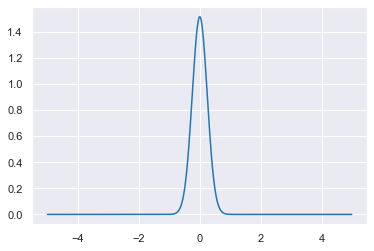

In [6]:
x = np.arange(-5, 5, 0.01)
# y_ce = ce(0, q, x * 180 / pi)
# y_se = se(0, q, x * 180 / pi)
y_f = f(0, q, x * 180 / pi)

# plt.plot(x, y_ce)
# plt.plot(x, y_se)
plt.plot(x, y_f)

Coefficients of the contributions:

In [7]:
def coeff(n, q, m):
    # Remember that f employs degrees NOT radians!
    def integrand(x):
        return f(n, q, x * 180 / pi) * phi(m, x)

    Re = integrate.quad(lambda x: np.real(integrand(x)), -pi, pi)[0]
    Im = integrate.quad(lambda x: np.imag(integrand(x)), -pi, pi)[0]

    return Re + Im * 1j

In [8]:
def phi_approx(k, q, m, x):
    # Remember that f employs degrees NOT radians!
    val = 0

    for i in range(0, k + 1):
        val += coeff(i, q, m) * f(i, q, x * 180 / pi)

    return val

In [27]:
%%time

k_max = 100
m = 2
step_size = 0.01  # change step size at will for a smoother plot

x = np.arange(-pi, pi, step_size)

y_re = np.real(phi(m, x))
y_im = np.imag(phi(m, x))

y_approx_re = np.real(phi_approx(k_max, q, m, x))
y_approx_im = np.imag(phi_approx(k_max, q, m, x))

CPU times: user 4.79 s, sys: 3.19 ms, total: 4.79 s
Wall time: 4.8 s


Plots for $\tilde{\phi}$ and $\phi$:

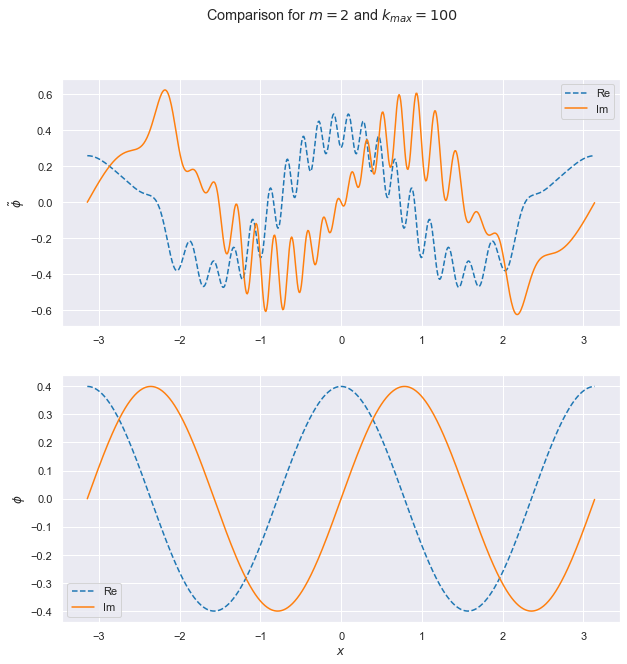

In [28]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle(r"Comparison for $m=2$ and $k_{max}=100$")

axs[0].plot(x, y_approx_re, label='Re', linestyle='--')
axs[0].plot(x, y_approx_im, label='Im')

axs[1].plot(x, y_re, label='Re', linestyle='--')
axs[1].plot(x, y_im, label='Im')

axs[0].set(ylabel=r"$\tilde{\phi}$")
axs[1].set(xlabel=r'$x$', ylabel=r'$\phi$')

for ax in axs.flat:
    #     ax.set(xlabel='x', ylabel='$\phi$')
    ax.legend()